## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [2]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
#tap_df = pd.read_csv('../../../Source/Data/tap_n20.csv')

In [3]:
#tap_df.head()

## Quick & dirty test with a little bit of data

### LogReg it like you mean it!

In [4]:
#data = tap_df.iloc[:,3:].values
#labels = tap_df['Labels']

In [5]:
#data
#labels


In [6]:
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42, stratify=labels)

In [7]:
X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')

X_train = X_train.drop(['Path'], axis = 1).values
X_test = X_test.drop(['Path'], axis = 1).values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [12]:
y_train.shape

(234,)

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [15]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [16]:
results

,True,Predict_lr,Prob_0_lr
0,1,1,0.052536
1,1,1,0.035040
2,1,1,0.266031
3,0,0,0.994430
4,0,1,0.488160
5,0,0,0.983340
6,0,0,0.554218
7,1,1,0.362261
8,1,1,0.014473
9,0,0,0.984247


In [17]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8461538461538461


### YAAAAAAAAASSSSSS QUEEN!

### Visualizing results

In [18]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

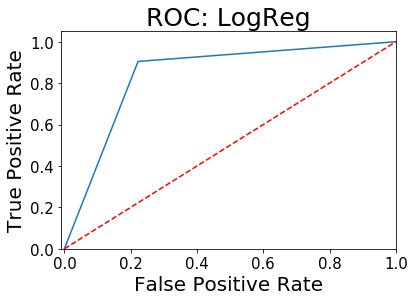

ROC_AUC_Score: 0.8412698412698412


In [19]:
ROC_plot('LogReg',  y_test, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [44]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [46]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [47]:
results

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
0,1,1,0.052536,1,0.225410
1,1,1,0.035040,1,0.137718
2,1,1,0.266031,1,0.268544
3,0,0,0.994430,0,0.802804
4,0,1,0.488160,0,0.692367
5,0,0,0.983340,0,0.833839
6,0,0,0.554218,0,0.907407
7,1,1,0.362261,1,0.149897
8,1,1,0.014473,1,0.078880
9,0,0,0.984247,0,0.723141


In [48]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 1.0


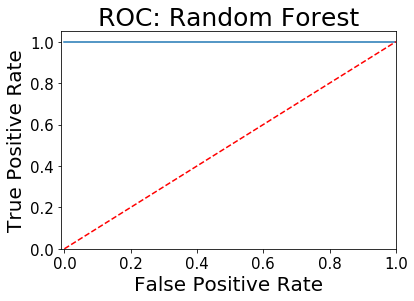

ROC_AUC_Score: 1.0


In [49]:
ROC_plot('Random Forest', y_test, predict_rf)

In [ ]:
#results.to_csv('../../../Source/Data/Train_results_mfccplus_perfect.csv', index=None)

## Weird.
Try with other data